![qiskit_header.png](../../images/qiskit_header.png)

# Compiling and Running on Different Architectures

<div class="alert alert-block alert-danger">
<b>Important:</b> This notebook assumes you have an account and associated token from Alpine Quantum Technologies.
</div>

This notebook illustrates the usage of Qiskit to run the same circuits on multiple backends, with very different technologies and architectures: simulator, superconducting system, and ion-trap system.

Three example experiments are provided for making a GHZ state, using 3 different circuits.
- Example 1 is the standard textbook version.
- Example 2 is optimized for trapped-ion two-qubit gates.
- Example 3 uses a global Molmer Sorenson gate which is specifically for ion traps.

The backends are all online, provided by IBM Q and Alpine Quantum Technologies (AQT).

### Get backends: AQT Device/Simulator + IBMQ Device/Simulator

In [1]:
from qiskit.providers.ibmq import IBMQ
from qiskit.providers.aqt import AQT

ibmq_provider = IBMQ.load_account()        # credentials stored on disk
aqt_provider = AQT.enable_account('1234')  # demo credentials

ibmq_simulator = ibmq_provider.get_backend('ibmq_qasm_simulator')
ibmq_device = ibmq_provider.get_backend('ibmq_5_yorktown')
aqt_simulator = aqt_provider.get_backend('aqt_qasm_simulator')
aqt_device = aqt_provider.get_backend('aqt_innsbruck')

### Example 1: Standard GHZ State

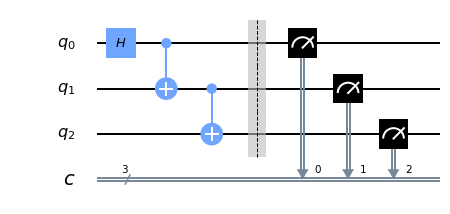

In [2]:
from numpy import pi
from qiskit import *
from qiskit.visualization import plot_histogram

n = 3
qc = QuantumCircuit(n, n)
qc.h(0)
for i in range(0, n-1):
    qc.cx(i, i+1)
qc.barrier()
qc.measure(range(n), range(n))
qc.draw(output='mpl')

In [3]:
# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

backend:  aqt_innsbruck


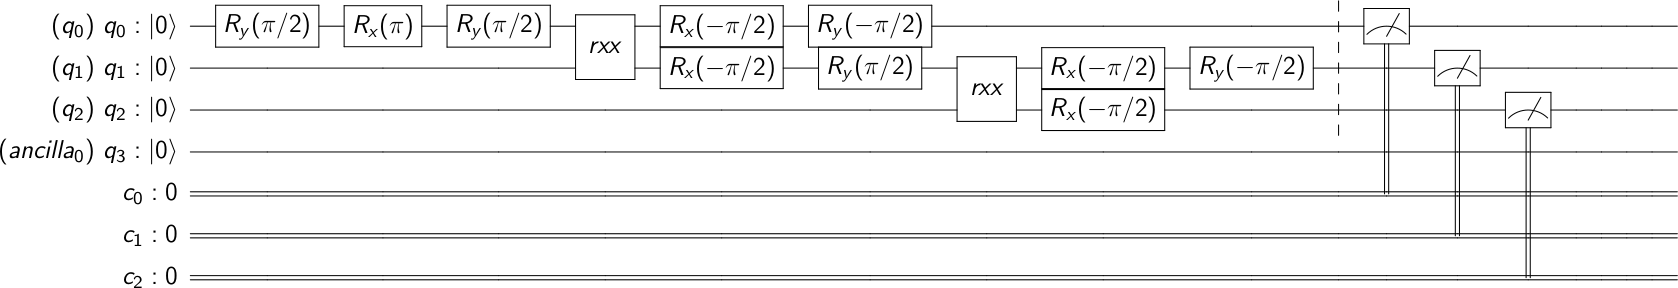

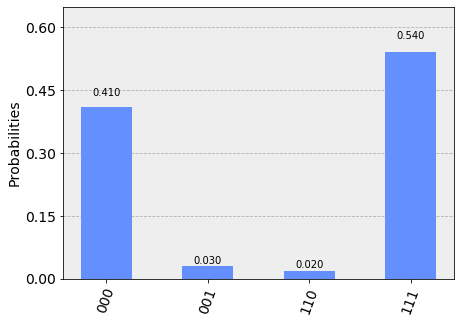

backend:  aqt_innsbruck


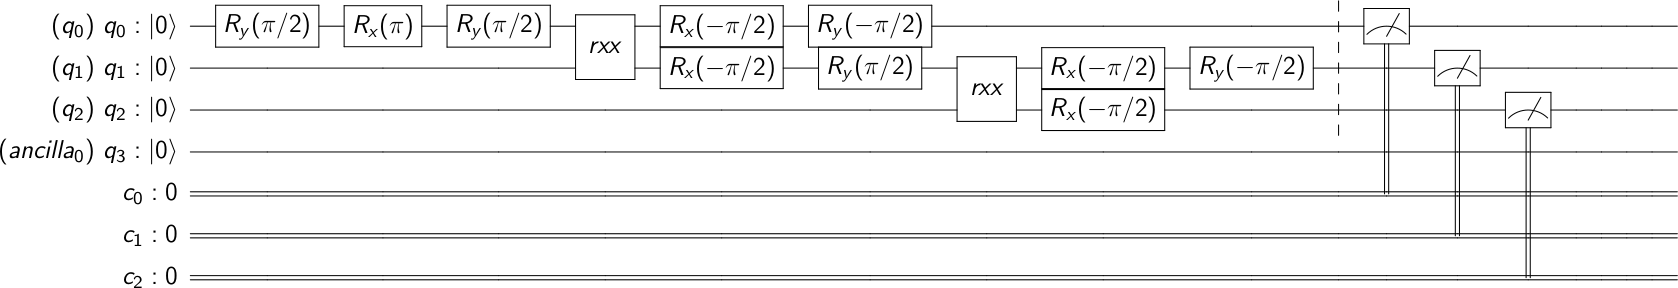

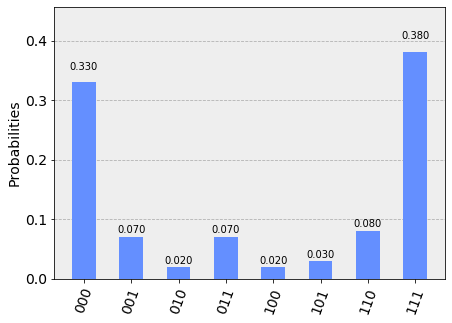

backend:  ibmq_qasm_simulator


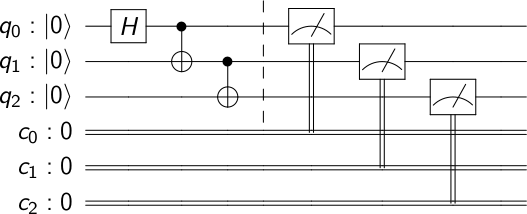

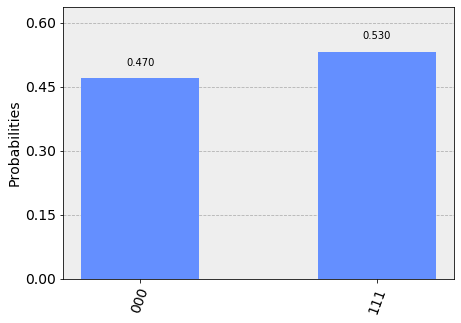

backend:  ibmqx2


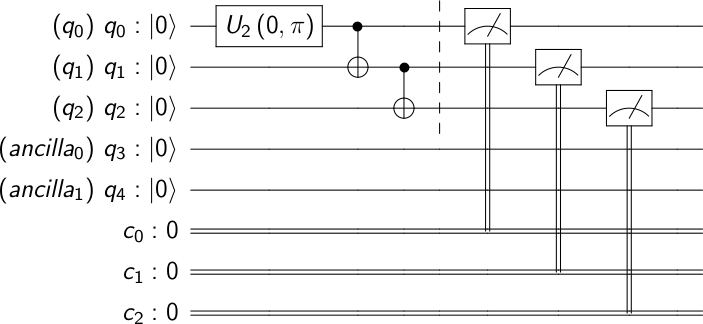

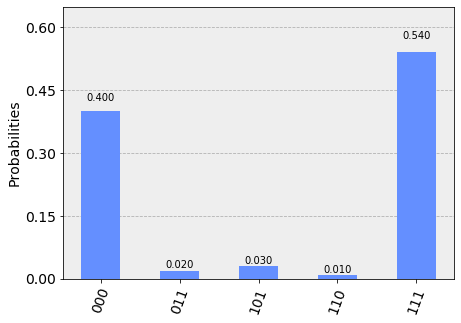

In [4]:
# transpile, plot circuit, run, plot result
backends = [aqt_simulator, aqt_device, ibmq_simulator, ibmq_device]
for be in backends:
    print("backend: ", be.name())
    new_qc = transpile(qc, be)
    new_qc.draw(output='latex', scale=0.5)

    qobj = assemble(new_qc, be, shots=100)
    job = be.run(qobj)
    counts = job.result().get_counts()
    plot_histogram(counts)

# restore display settings
InteractiveShell.ast_node_interactivity = "last_expr"

### Example 2: Optimized GHZ for Ions

In [8]:
qc = QuantumCircuit(4, 4)
qc.rxx(pi/2, 0, 1)
qc.rxx(pi/2, 0, 2)
qc.rxx(pi/2, 0, 3)
qc.barrier()
qc.rx(pi/2, 0)
qc.rx(-pi/2, [1, 2, 3])
qc.ry(-pi/2, 0)
qc.barrier()
qc.measure(range(0, 4), range(0, 4))
qc.draw(output='text', line_length=100)

In [9]:
# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

backend:  aqt_innsbruck


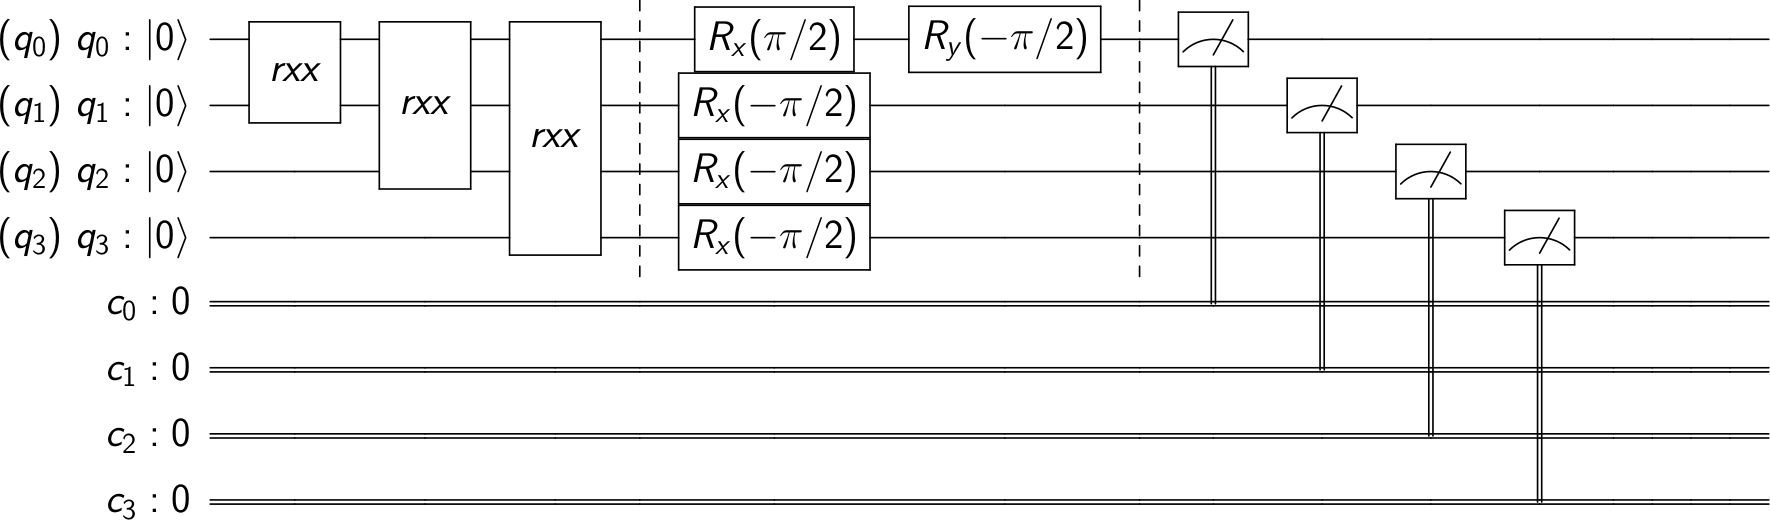

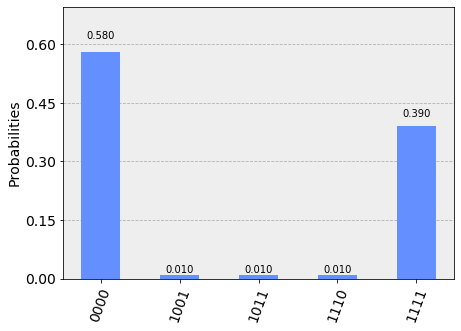

backend:  aqt_innsbruck


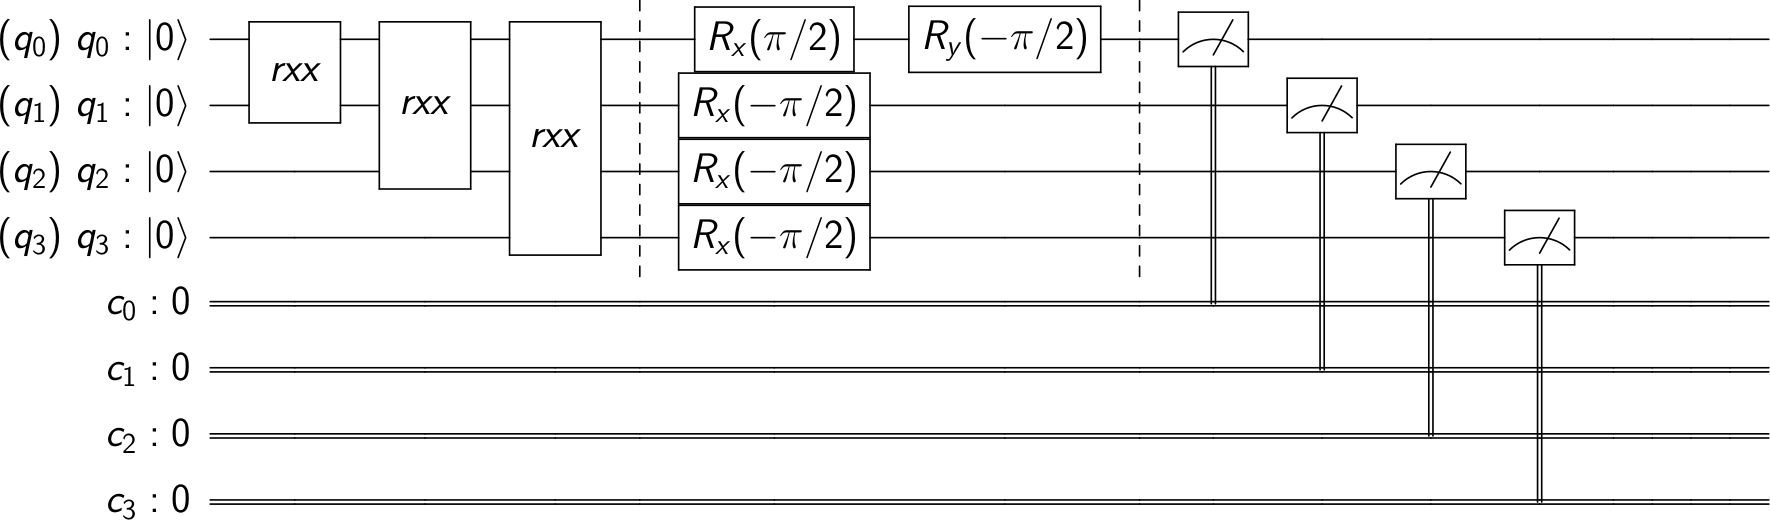

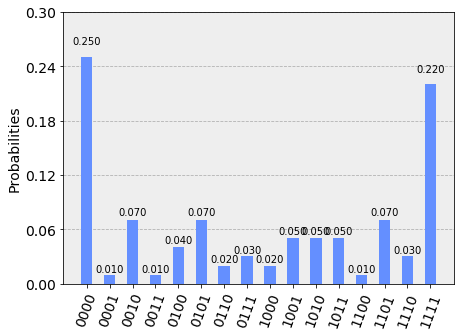

backend:  ibmq_qasm_simulator


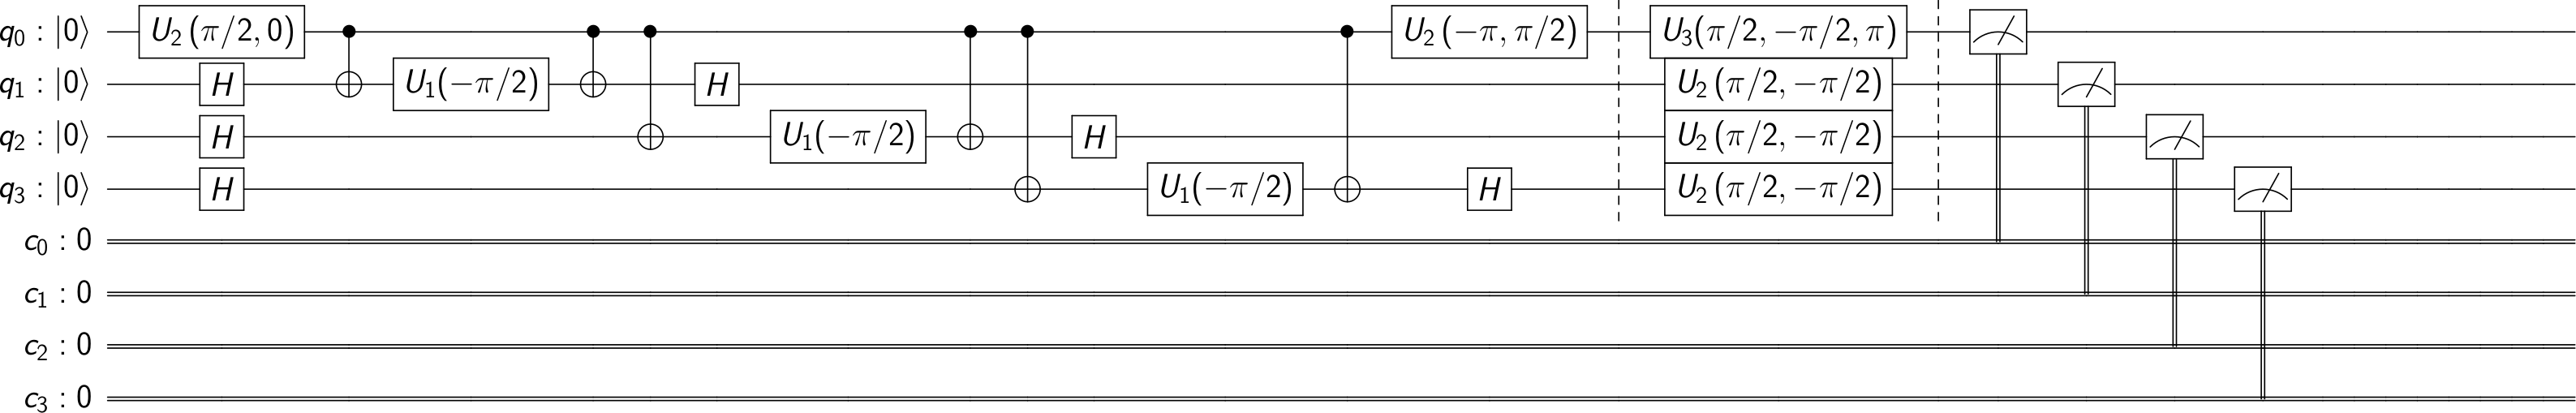

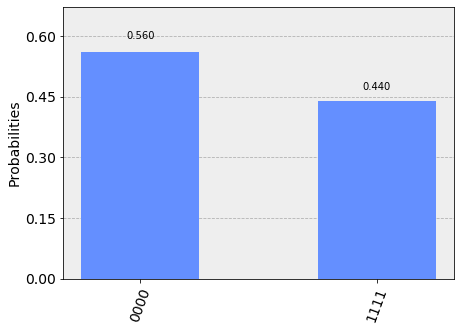

backend:  ibmqx2


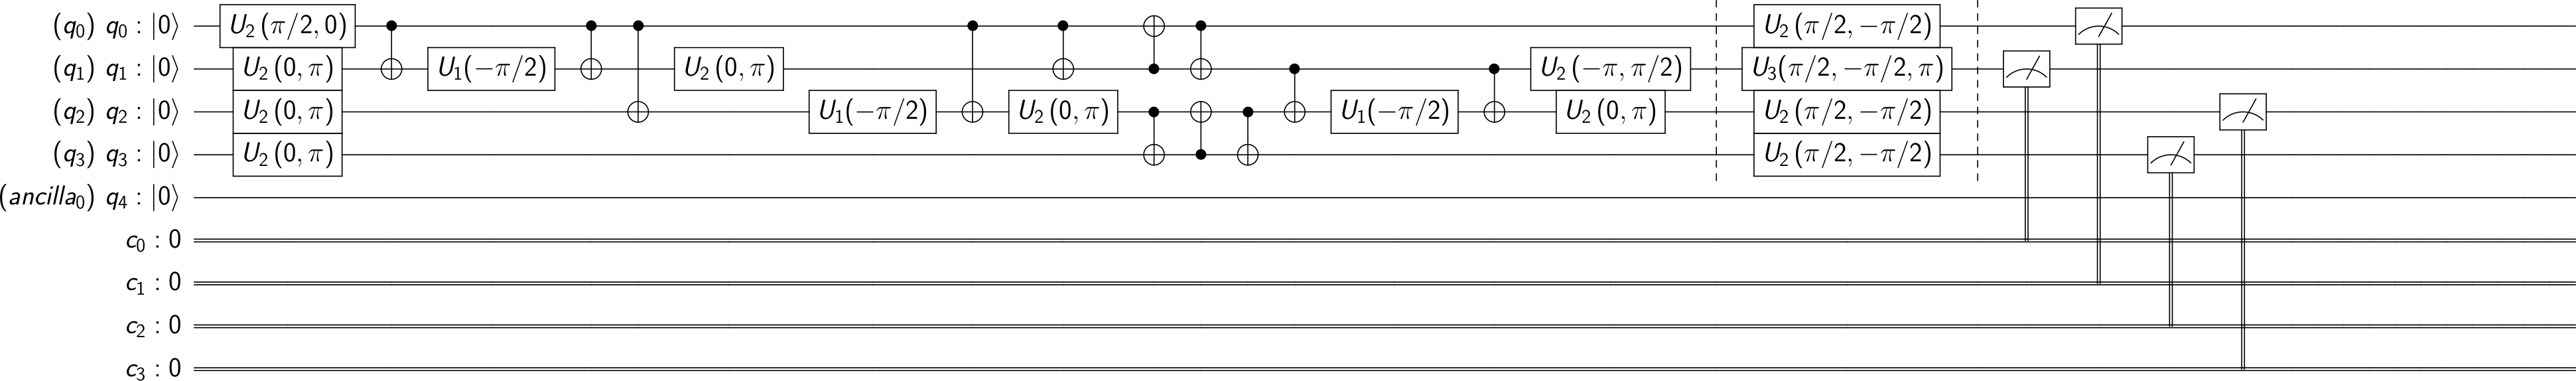

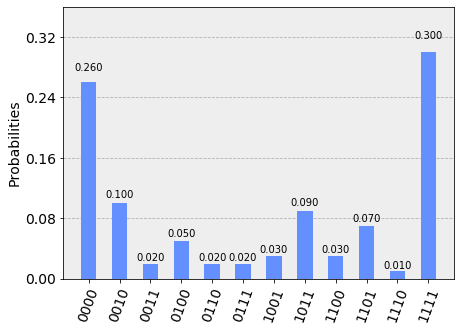

In [10]:
# transpile, plot circuit, run, plot result
backends = [aqt_simulator, aqt_device, ibmq_simulator, ibmq_device]
for be in backends:
    print("backend: ", be.name())
    new_qc = transpile(qc, be)
    new_qc.draw(output='latex', scale=0.8)

    qobj = assemble(new_qc, be, shots=100)
    job = be.run(qobj)
    counts = job.result().get_counts()
    plot_histogram(counts)

# restore display settings
InteractiveShell.ast_node_interactivity = "last_expr"

### Example 3: GHZ with Global MS Gate

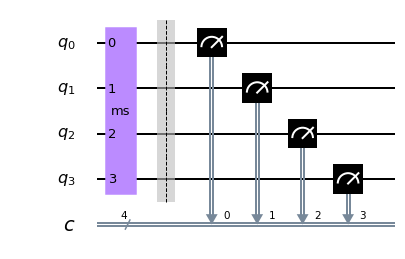

In [5]:
qc = QuantumCircuit(4, 4)
qc.ms(pi/2, [0, 1, 2, 3])
qc.barrier()
qc.measure(range(4), range(4))
qc.draw(output='mpl')

In [6]:
# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

backend:  aqt_innsbruck


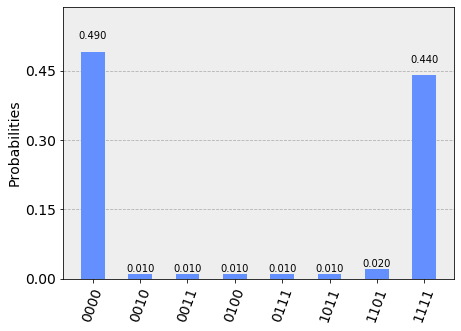

In [7]:
# transpile, plot circuit, run, plot result
backends = [aqt_device]
for be in backends:
    print("backend: ", be.name())
    new_qc = transpile(qc, be)
    new_qc.draw(output='text', scale=0.8)

    qobj = assemble(new_qc, be, shots=100)
    job = be.run(qobj)
    counts = job.result().get_counts()
    plot_histogram(counts)

# restore display settings
InteractiveShell.ast_node_interactivity = "last_expr"

#### ... global MS decomposed to run on IBM devices

In [11]:
# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

backend:  ibmq_qasm_simulator


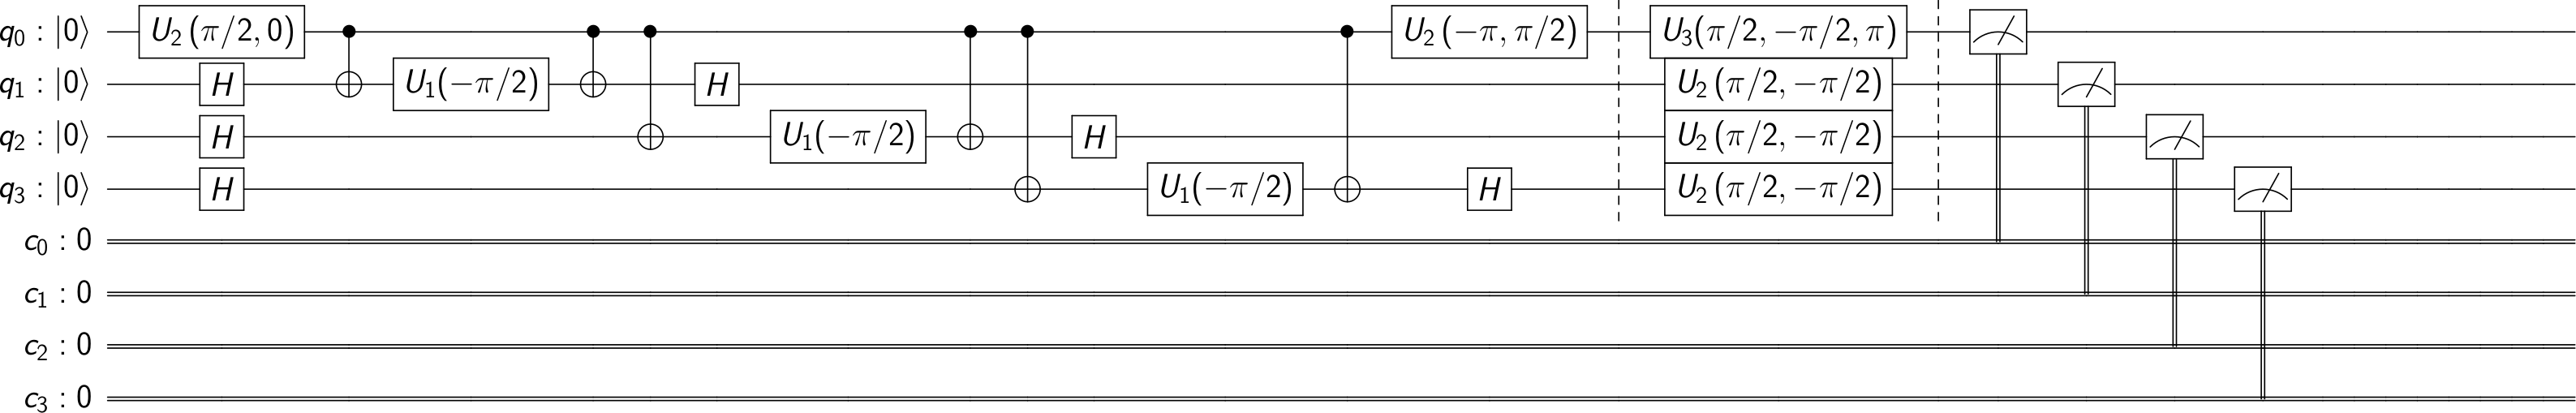

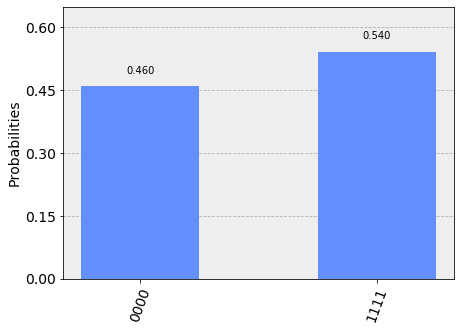

backend:  ibmqx2


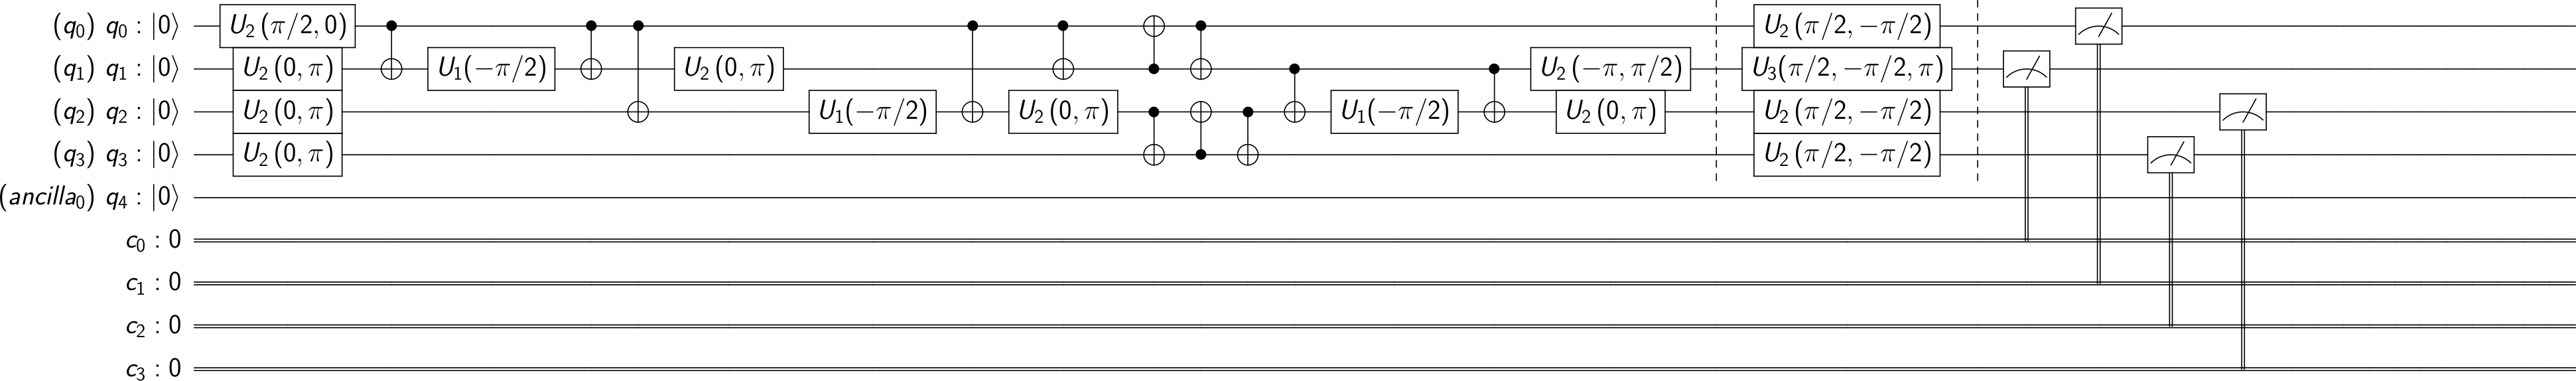

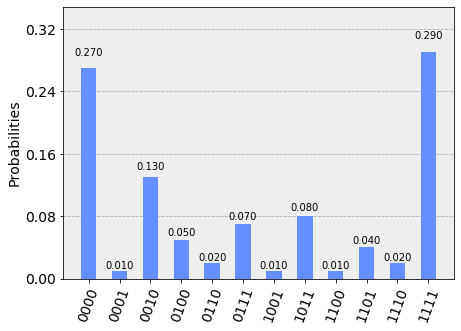

In [13]:
# same global MS gate now running on IBM backends
backends = [ibmq_simulator, ibmq_device]
for be in backends:
    print("backend: ", be.name())
    new_qc = transpile(qc, be)
    new_qc.draw(output='latex', scale=0.8)

    qobj = assemble(new_qc, be, shots=100)
    job = be.run(qobj)
    counts = job.result().get_counts()
    plot_histogram(counts)

# restore display settings
InteractiveShell.ast_node_interactivity = "last_expr"

In [2]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright